# Jupyter Notebook for the Battle-Of-The-Neighborhoods
William Brent Lander


## Initial includes, and instantiation of key includes

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib.pyplot as pltv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.colors as colors
import matplotlib.cm as cmx
import math

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.19.0-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00  23.16 MB/s
geopy-1.19.0-p 100% |################################| Time: 0:00:00  34.24 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  49.82 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  34.65 MB/s
vincent-0.4.4- 100% |###################

## First get the list of neighborhoods, populations, size... from https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods

In [2]:
tables = pd.read_html("https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods")
demographics_df = tables[1]
print(demographics_df.shape)
cols = [1, 2, 6, 8, 9, 10, 11, 12]
demographics_df.drop(demographics_df.columns[cols],axis=1,inplace=True)
demographics_df.columns = demographics_df.iloc[0]
demographics_df.drop([0, 1], axis=0, inplace=True)
demographics_df.set_index('Name', inplace=True)
demographics_df.loc[63, 'Average Income'] = '45,792'
demographics_df[["Population", "Land area (km2)","Density (people/km2)"]] = demographics_df[["Population", "Land area (km2)","Density (people/km2)"]].apply(pd.to_numeric)

(176, 13)


# Use geolocate to get center of neighborhood.

In [3]:
geolocator = Nominatim(user_agent="foursquare_agent")
demographics_df["latitude"] = np.nan
demographics_df["longitude"] = np.nan
demographics_df["radius"] = np.nan
for thisNeighborhood, thisRow in demographics_df.iterrows():
    if isinstance(thisNeighborhood, str):
        address = thisNeighborhood + ", Toronto, CA"
        location = geolocator.geocode(address)
        if location is not None:
            demographics_df.loc[thisNeighborhood, 'latitude'] = location.latitude
            demographics_df.loc[thisNeighborhood, 'longitude'] = location.longitude
            thisArea = demographics_df.loc[thisNeighborhood,'Land area (km2)']
            thisRadius = math.sqrt(thisArea)/math.pi
            demographics_df.loc[thisNeighborhood, 'radius'] = thisRadius*1000. # killometer to meter
demographics_df = demographics_df[pd.notnull(demographics_df['latitude'])]
print(demographics_df.shape)
demographics_df

(158, 7)


,Population,Land area (km2),Density (people/km2),Average Income,latitude,longitude,radius
Name,,,,,,,
Agincourt,44577.0,12.45,3580.0,25750,43.785353,-79.278549,1123.142349
Alderwood,11656.0,4.94,2360.0,35239,43.601717,-79.545232,707.479079
Alexandra Park,4355.0,0.32,13609.0,19687,43.650758,-79.404298,180.063263
Allenby,2513.0,0.58,4333.0,245592,43.711351,-79.553424,242.417587
Amesbury,17318.0,3.51,4934.0,27546,43.706162,-79.483492,596.353381
Armour Heights,4384.0,2.29,1914.0,116651,43.743944,-79.430851,481.690264
Banbury,6641.0,2.72,2442.0,92319,43.742796,-79.369957,524.970113
Bathurst Manor,14945.0,4.69,3187.0,34169,43.763893,-79.456367,689.344871
Bay Street Corridor,4787.0,0.11,43518.0,40598,43.664286,-79.387114,105.571446


In [4]:

categoryIdtoType_df={ 'American Restaurant':['4bf58dd8d48988d14e941735', '4bf58dd8d48988d157941735', '4bf58dd8d48988d1bf941735', '4bf58dd8d48988d14f941735', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
'Asian Restaurant':['4bf58dd8d48988d142941735', '56aa371be4b08b9a8d573568', '52e81612bcbc57f1066b7a03', '4bf58dd8d48988d145941735', '52af3a5e3cf9994f4e043bea', '52af3a723cf9994f4e043bec', '52af3a7c3cf9994f4e043bed', '58daa1558bbb0b01f18ec1d3', '52af3a673cf9994f4e043beb', '52af3a903cf9994f4e043bee', '4bf58dd8d48988d1f5931735', '52af3a9f3cf9994f4e043bef', '52af3aaa3cf9994f4e043bf0', ' 52af3ab53cf9994f4e043bf1', '52af3abe3cf9994f4e043bf2', '52af3ac83cf9994f4e043bf3', '52af3ad23cf9994f4e043bf4', '52af3add3cf9994f4e043bf5', '52af3af23cf9994f4e043bf7', '52af3ae63cf9994f4e043bf6', '52af3afc3cf9994f4e043bf8', '52af3b053cf9994f4e043bf9', '52af3b213cf9994f4e043bfa', '52af3b293cf9994f4e043bfb', '52af3b343cf9994f4e043bfc', '52af3b3b3cf9994f4e043bfd', '52af3b463cf9994f4e043bfe', '52af3b633cf9994f4e043c01', '52af3b513cf9994f4e043bff', '52af3b593cf9994f4e043c00', '52af3b6e3cf9994f4e043c02. 52af3b773cf9994f4e043c03', '52af3b813cf9994f4e043c04', '52af3b893cf9994f4e043c05', '52af3b913cf9994f4e043c06', '52af3b9a3cf9994f4e043c0752af3ba23cf9994f4e043c08', '4eb1bd1c3b7b55596b4a748f', '52e81612bcbc57f1066b79fb', '52af0bd33cf9994f4e043bdd', '4deefc054765f83613cdba6f', '52960eda3cf9994f4e043ac9', '52960eda3cf9994f4e043acb', '52960eda3cf9994f4e043aca', '52960eda3cf9994f4e043acc', '52960eda3cf9994f4e043ac7', '52960eda3cf9994f4e043ac8', '52960eda3cf9994f4e043ac5', '52960eda3cf9994f4e043ac6', '4bf58dd8d48988d111941735. 55a59bace4b013909087cb0c55a59bace4b013909087cb30', '55a59bace4b013909087cb21 ', ' 55a59bace4b013909087cb18', '55a59bace4b013909087cb24', '55a59bace4b013909087cb15', '55a59bace4b013909087cb27', '55a59bace4b013909087cb12', '4bf58dd8d48988d1d2941735', '55a59bace4b013909087cb2d', '55a59a31e4b013909087cb00', '55a59af1e4b013909087cb03', '55a59bace4b013909087cb2a', '55a59bace4b013909087cb0f', '55a59bace4b013909087cb33', '55a59bace4b013909087cb09', '55a59bace4b013909087cb36', '4bf58dd8d48988d113941735', '56aa371be4b08b9a8d5734e4', '56aa371be4b08b9a8d5734f0', '56aa371be4b08b9a8d5734e7', '56aa371be4b08b9a8d5734ed', '56aa371be4b08b9a8d5734ea', '4bf58dd8d48988d156941735', '5ae9595eb77c77002c2f9f26', '4eb1d5724b900d56c88a45fe', '4bf58dd8d48988d1d1941735', '56aa371be4b08b9a8d57350e', '4bf58dd8d48988d149941735', '56aa371be4b08b9a8d573502', '52af39fb3cf9994f4e043be9', '4bf58dd8d48988d14a941735', '4bf58dd8d48988d108941735', '4bf58dd8d48988d10f941735', '54135bf5e4b08f3d2429dfe5', '54135bf5e4b08f3d2429dff3', '', '54135bf5e4b08f3d2429dfe2', '54135bf5e4b08f3d2429dff2', '54135bf5e4b08f3d2429dfe1', '54135bf5e4b08f3d2429dfe3', '54135bf5e4b08f3d2429dfe8', '54135bf5e4b08f3d2429dfe9', '54135bf5e4b08f3d2429dfe6', '54135bf5e4b08f3d2429dfdf', '54135bf5e4b08f3d2429dfe4', '54135bf5e4b08f3d2429dfe7', '54135bf5e4b08f3d2429dfea', '54135bf5e4b08f3d2429dfeb', '54135bf5e4b08f3d2429dfed', '54135bf5e4b08f3d2429dfee', '54135bf5e4b08f3d2429dff4', '54135bf5e4b08f3d2429dfe0', '54135bf5e4b08f3d2429dfdd', '54135bf5e4b08f3d2429dff6', ' 54135bf5e4b08f3d2429dfef', '54135bf5e4b08f3d2429dff0', '54135bf5e4b08f3d2429dff1', '54135bf5e4b08f3d2429dfde', '54135bf5e4b08f3d2429dfec', '4bf58dd8d48988d110941735', '52e81612bcbc57f1066b79f8', '5413605de4b0ae91d18581a9', '503288ae91d4c4b30a586d67'],
'Australian Restaurant':['4bf58dd8d48988d169941735', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
'Eastern European Restaurant':['52e81612bcbc57f1066b7a01', '5293a7d53cf9994f4e043a45', '4bf58dd8d48988d109941735', '52e928d0bcbc57f1066b7e97', '58daa1558bbb0b01f18ec1ee', '56aa371be4b08b9a8d5734f3.', '52960bac3cf9994f4e043ac4', '52e928d0bcbc57f1066b7e98', '58daa1558bbb0b01f18ec1e2', '5283c7b4e4b094cb91ec88d4', '56aa371be4b08b9a8d5734bf', '58daa1558bbb0b01f18ec1dc', '58daa1558bbb0b01f18ec1df', '530faca9bcbc57f1066bc2f2', '5283c7b4e4b094cb91ec88da', '5283c7b4e4b094cb91ec88d5', '56aa371be4b08b9a8d5734bd', '56aa371be4b08b9a8d573535', '5283c7b4e4b094cb91ec88d6', '5283c7b4e4b094cb91ec88db', '5283c7b4e4b094cb91ec88d9', '530faca9bcbc57f1066bc2f4', '4f04af1f2fb6e1c99f3db0bb', '530faca9bcbc57f1066bc2f3', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '' ''],
'Bakery':['4bf58dd8d48988d16a941735', '5744ccdfe4b0c0459246b4e2', '52e81612bcbc57f1066b7a0a', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
'Western European Restaurant':['52e81612bcbc57f1066b7a02', '52e81612bcbc57f1066b79f2', '52f2ae52bcbc57f1066b8b81', '5744ccdfe4b0c0459246b4d0', ' 52e81612bcbc57f1066b7a05', '52e81612bcbc57f1066b7a09', '4bf58dd8d48988d10c941735', '57558b36e4b065ecebd306b6', '57558b36e4b065ecebd306b8', '57558b36e4b065ecebd306bc', '57558b36e4b065ecebd306b0', '57558b36e4b065ecebd306c5', '57558b36e4b065ecebd306c0', '57558b36e4b065ecebd306cb', '57558b36e4b065ecebd306ce', '57558b36e4b065ecebd306d1', '57558b36e4b065ecebd306b4', '57558b36e4b065ecebd306b2', '57558b35e4b065ecebd306ad', '57558b36e4b065ecebd306d4', '57558b36e4b065ecebd306d7', '57558b36e4b065ecebd306ba', '55d25775498e9f6a0816a37a', '4d4ae6fc7a7b7dea34424761', '4bf58dd8d48988d10d941735', '56aa371ce4b08b9a8d573572', '56aa371ce4b08b9a8d57358e', '56aa371ce4b08b9a8d57358b', '56aa371ce4b08b9a8d573574', '56aa371ce4b08b9a8d573592', '56aa371ce4b08b9a8d573578', '56aa371ce4b08b9a8d57357b', '56aa371ce4b08b9a8d573587', '56aa371ce4b08b9a8d57357f', '56aa371ce4b08b9a8d573576', '4bf58dd8d48988d10e941735', '53d6c1b0e4b02351e88a83e8', '53d6c1b0e4b02351e88a83e2', '53d6c1b0e4b02351e88a83d8', '53d6c1b0e4b02351e88a83d6', '53d6c1b0e4b02351e88a83e6', '53d6c1b0e4b02351e88a83e4', '53d6c1b0e4b02351e88a83da', '53d6c1b0e4b02351e88a83d4', '53d6c1b0e4b02351e88a83dc', '53d6c1b0e4b02351e88a83e0', '52e81612bcbc57f1066b79f3', '53d6c1b0e4b02351e88a83d2', '53d6c1b0e4b02351e88a83de', '52e81612bcbc57f1066b79fa', '55a5a1ebe4b013909087cbb6', '55a5a1ebe4b013909087cb7c', '55a5a1ebe4b013909087cba7', '55a5a1ebe4b013909087cba1', '55a5a1ebe4b013909087cba4', '55a5a1ebe4b013909087cb95', '55a5a1ebe4b013909087cb89', '55a5a1ebe4b013909087cb9b', '55a5a1ebe4b013909087cb98', '55a5a1ebe4b013909087cbbf', '55a5a1ebe4b013909087cb79', '55a5a1ebe4b013909087cbb0', '55a5a1ebe4b013909087cbb3', '55a5a1ebe4b013909087cb74', '55a5a1ebe4b013909087cbaa', '55a5a1ebe4b013909087cb83', '55a5a1ebe4b013909087cb8c', '55a5a1ebe4b013909087cb92', '55a5a1ebe4b013909087cb8f', '55a5a1ebe4b013909087cb86', '55a5a1ebe4b013909087cbb9', '55a5a1ebe4b013909087cb7f', '55a5a1ebe4b013909087cbbc', '55a5a1ebe4b013909087cb9e', '55a5a1ebe4b013909087cbc2', '55a5a1ebe4b013909087cbad', '4bf58dd8d48988d1c0941735', '52e81612bcbc57f1066b79f9', '52e81612bcbc57f1066b7a04', '4def73e84765ae376e57713a', '5293a7563cf9994f4e043a44', '52e928d0bcbc57f1066b7e9d', '52e928d0bcbc57f1066b7e9c', '4bf58dd8d48988d1c6941735', '5744ccdde4b0c0459246b4a3', '4bf58dd8d48988d14d941735', '4bf58dd8d48988d1db931735', '4bf58dd8d48988d158941735', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
'Bistro':['52e81612bcbc57f1066b79f1', '4bf58dd8d48988d1c4941735', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
'Breakfast Spot':['4bf58dd8d48988d179941735', '4bf58dd8d48988d148941735', '4bf58dd8d48988d143941735', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
'Coffee or Tea Shop':['52e81612bcbc57f1066b7a0c', '4bf58dd8d48988d1e0931735', '52e81612bcbc57f1066b79f2', '4bf58dd8d48988d112941735', '56aa371be4b08b9a8d5734c1', '4bf58dd8d48988d1dc931735', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
'Buffet':['52e81612bcbc57f1066b79f4', '4bf58dd8d48988d128941735', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
'Café':['4bf58dd8d48988d16d941735', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
'North American Restaurant':['4bf58dd8d48988d17a941735', '52e81612bcbc57f1066b7a00', '4bf58dd8d48988d147941735', '4d4ae6fc7a7b7dea34424761', '52e81612bcbc57f1066b79fe', '56aa371be4b08b9a8d5734c7', '4bf58dd8d48988d1cc941735', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
'Caribbean Restaurant':['4bf58dd8d48988d144941735', '4bf58dd8d48988d154941735', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
'Deli or Bodega':['4bf58dd8d48988d146941735', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
'Dessert Shop':['4bf58dd8d48988d1d0941735', '4bf58dd8d48988d1bc941735', '512e7cae91d4cbb4e5efe0af', '4bf58dd8d48988d1c9941735', '5744ccdfe4b0c0459246b4e2', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
'Middle Eastern Restaurant':['4bf58dd8d48988d10b941735', '52e81612bcbc57f1066b79ff', '5283c7b4e4b094cb91ec88d7', '4bf58dd8d48988d115941735', '5bae9231bedf3950379f89e7', '56aa371be4b08b9a8d573529', '5744ccdfe4b0c0459246b4ca', '58daa1558bbb0b01f18ec1cd', '52e81612bcbc57f1066b79f7', '58daa1558bbb0b01f18ec1bc', '58daa1558bbb0b01f18ec1c0', '58daa1558bbb0b01f18ec1c4', '58daa1558bbb0b01f18ec1c7', '5744ccdfe4b0c0459246b4a8', '5bae9231bedf3950379f89e4', '5bae9231bedf3950379f89da', '5bae9231bedf3950379f89ea', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '' '', ''],
'Fast Food':['4bf58dd8d48988d16e941735', '4bf58dd8d48988d16c941735', '4edd64a0c7ddd24ca188df1a', '4bf58dd8d48988d120951735', '56aa371be4b08b9a8d57350b', '4bf58dd8d48988d1cb941735', '5bae9231bedf3950379f89d4', '4bf58dd8d48988d16f941735', '4bf58dd8d48988d1ca941735', '4bf58dd8d48988d1bd941735', '4bf58dd8d48988d1c5941735', '4bf58dd8d48988d1c7941735', '4bf58dd8d48988d1dd931735', '4bf58dd8d48988d14c941735', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
'Speciality Resturant':['4bf58dd8d48988d155941735', '52e81612bcbc57f1066b7a06', '4bf58dd8d48988d1c2941735', '56aa371be4b08b9a8d573508', '4bf58dd8d48988d1ce941735', '56aa371be4b08b9a8d573538', '4bf58dd8d48988d1d3941735', '53e510b7498ebcb1801b55d4', '4bf58dd8d48988d1df931735', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
'Pub':['56aa371ce4b08b9a8d573583', '4bf58dd8d48988d11b941735', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
'Gluten-free Restaurant':['4c2cd86ed066bed06c3c5209', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
'Jewish Restaurant':['52e81612bcbc57f1066b79fd', '52e81612bcbc57f1066b79fc', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
'Latin American Restaurant':['4bf58dd8d48988d1be941735', '4bf58dd8d48988d152941735', '52939a8c3cf9994f4e043a35', '4bf58dd8d48988d1c1941735', '58daa1558bbb0b01f18ec1d9', '4bf58dd8d48988d153941735', '4bf58dd8d48988d151941735', '56aa371ae4b08b9a8d5734ba', '5744ccdfe4b0c0459246b4d3', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
'South American Restaurant':['5745c7ac498e5d0483112fdb', '4bf58dd8d48988d1cd941735', '4bf58dd8d48988d107941735', '4bf58dd8d48988d16b941735', '5294c7523cf9994f4e043a62', '52939ae13cf9994f4e043a3b', '52939a9e3cf9994f4e043a36', '52939a643cf9994f4e043a33', '5294c55c3cf9994f4e043a61', '52939af83cf9994f4e043a3d', '52939aed3cf9994f4e043a3c', '52939aae3cf9994f4e043a37', '52939ab93cf9994f4e043a38', '5294cbda3cf9994f4e043a63', '52939ac53cf9994f4e043a39', '52939ad03cf9994f4e043a3a', '52939a7d3cf9994f4e043a34', '58daa1558bbb0b01f18ec1f4', '4eb1bfa43b7b52c0e1adc2e8', '56aa371be4b08b9a8d573558', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
'African Restaurant':['4bf58dd8d48988d1c3941735', '5bae9231bedf3950379f89e1', '4bf58dd8d48988d10a941735', '4bf58dd8d48988d1c8941735', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
'Truck Stop':['57558b36e4b065ecebd306dd', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
'Bar':['4bf58dd8d48988d1d6941735', '4bf58dd8d48988d11a941735', '4bf58dd8d48988d11f941735', '4bf58dd8d48988d121941735', '50327c8591d4c4b30a586d5d', '4bf58dd8d48988d123941735', '4bf58dd8d48988d122941735', '56aa371be4b08b9a8d57354d', '4bf58dd8d48988d11d941735', '4bf58dd8d48988d1d4941735', '4bf58dd8d48988d11c941735', '4bf58dd8d48988d120941735', '4bf58dd8d48988d1d5941735', '4bf58dd8d48988d1d8941735', '4bf58dd8d48988d118941735', '4bf58dd8d48988d11e941735', '52e81612bcbc57f1066b7a0e', '4bf58dd8d48988d117941735', '56aa371ce4b08b9a8d57356c', '52e81612bcbc57f1066b7a0d', '4bf58dd8d48988d116941735', '4d4b7105d754a06376d81259', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
}

# Create the taxonomy grouping restaurant classes by ID

In [5]:
# Now go to Foursquare to find out about existing resturants in each neighborhood

restaurantTypeByNeighborhood_df = pd.DataFrame(0, index=categoryIdtoType_df.keys(), columns=list(demographics_df.index.values), dtype=int )
CLIENT_ID = 'I43OVGOA5NOCBGYDBLJSVKJ3KA5L54VMCUSEMZ4LBTX2Z5WY' # your Foursquare ID
CLIENT_SECRET = 'PXEIZ110PWHAEKXPU14ZPJQVSHISD5BSP5G341I1N30A2N5Q' # your Foursquare Secret
VERSION = '20180604'
for thisNeighborhood, thisRow in demographics_df.iterrows():
#    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&intent="browse"&categoryId=4d4b7105d754a06374d81259&radius={}&limit=100'.format(CLIENT_ID, CLIENT_SECRET, demographics_df.loc[thisNeighborhood, 'latitude'], demographics_df.loc[thisNeighborhood, 'longitude'], VERSION, demographics_df.loc[thisNeighborhood, 'radius'])
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&intent="browse"&radius={}&limit=100'.format(CLIENT_ID, CLIENT_SECRET, demographics_df.loc[thisNeighborhood, 'latitude'], demographics_df.loc[thisNeighborhood, 'longitude'], VERSION, demographics_df.loc[thisNeighborhood, 'radius'])
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    for thisVenue in venues:
        if len(thisVenue['categories']) > 0:
            categoryId = thisVenue['categories'][0]['id']
            for thisType in list(categoryIdtoType_df):
                if categoryId in categoryIdtoType_df[thisType]:
                    restaurantTypeByNeighborhood_df.loc[thisType, thisNeighborhood] = restaurantTypeByNeighborhood_df.loc[thisType, thisNeighborhood] + 1
                    break
restaurantTypeByNeighborhood_df

,Agincourt,Alderwood,Alexandra Park,Allenby,Amesbury,Armour Heights,Banbury,Bathurst Manor,Bay Street Corridor,Bayview Village,...,Westmount,Weston,Wexford,Willowdale,Wilson Heights,Woburn,Wychwood,York Mills,York University Heights,Yorkville
South American Restaurant,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Asian Restaurant,34,5,5,6,3,8,3,1,4,1,...,3,2,4,24,14,4,13,6,5,7
Speciality Resturant,1,2,3,0,1,1,0,0,0,0,...,1,0,1,0,2,0,2,0,1,0
Café,0,1,1,4,1,1,0,0,1,0,...,0,1,2,2,2,0,2,0,0,1
Pub,0,2,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
Deli or Bodega,0,0,2,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
Western European Restaurant,0,1,0,1,2,0,0,0,0,1,...,1,1,0,3,0,0,3,0,2,1
Truck Stop,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Latin American Restaurant,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
Eastern European Restaurant,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Create the marginals

In [6]:
# Graphically, the marginals are typically shown as the sums across rows and columns, shown on the right side and/or bottom of a table.
while 'sum' in restaurantTypeByNeighborhood_df.index:
    restaurantTypeByNeighborhood_df.drop(['sum'], inplace=True)
noMarginalRestaurantTypeByNeighborhood_df= pd.DataFrame().iloc[0:0]
noMarginalRestaurantTypeByNeighborhood_df = restaurantTypeByNeighborhood_df.copy(deep=True)
restaurantTypeByNeighborhood_df['Total by Type']= restaurantTypeByNeighborhood_df.sum(axis=1)
restaurantTypeByNeighborhood_df = restaurantTypeByNeighborhood_df.append(restaurantTypeByNeighborhood_df.agg(['sum']))
restaurantTypeByNeighborhood_df

,Agincourt,Alderwood,Alexandra Park,Allenby,Amesbury,Armour Heights,Banbury,Bathurst Manor,Bay Street Corridor,Bayview Village,...,Weston,Wexford,Willowdale,Wilson Heights,Woburn,Wychwood,York Mills,York University Heights,Yorkville,Total by Type
South American Restaurant,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
Asian Restaurant,34,5,5,6,3,8,3,1,4,1,...,2,4,24,14,4,13,6,5,7,676
Speciality Resturant,1,2,3,0,1,1,0,0,0,0,...,0,1,0,2,0,2,0,1,0,102
Café,0,1,1,4,1,1,0,0,1,0,...,1,2,2,2,0,2,0,0,1,142
Pub,0,2,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,32
Deli or Bodega,0,0,2,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,35
Western European Restaurant,0,1,0,1,2,0,0,0,0,1,...,1,0,3,0,0,3,0,2,1,120
Truck Stop,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Latin American Restaurant,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,63
Eastern European Restaurant,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20


# Wangle the data for better graphic display

In [7]:
noMarginalRestaurantTypeByNeighborhood_df = noMarginalRestaurantTypeByNeighborhood_df.append(noMarginalRestaurantTypeByNeighborhood_df.agg(['sum']))
noMarginalRestaurantTypeByNeighborhood_df.sort_values(by='sum',inplace=True,axis=1,ascending=False)
while 'sum' in noMarginalRestaurantTypeByNeighborhood_df.index:
    noMarginalRestaurantTypeByNeighborhood_df.drop(['sum'], inplace=True)

noMarginalRestaurantTypeByNeighborhood_df['Total by Type']= noMarginalRestaurantTypeByNeighborhood_df.sum(axis=1)
noMarginalRestaurantTypeByNeighborhood_df.sort_values(by="Total by Type",inplace=True,axis=0, ascending=False)
noMarginalRestaurantTypeByNeighborhood_df.drop(['Total by Type'], axis=1, inplace=True)
noMarginalRestaurantTypeByNeighborhood_df.drop(['Truck Stop', 'Australian Restaurant'], inplace=True)
noMarginalRestaurantTypeByNeighborhood_df

,Willowdale,Little Italy,Kensington Market,Agincourt,The Junction,Junction Triangle,Earlscourt,Lawrence Park,Milliken,Alexandra Park,...,Eringate,Sunnylea,St. James Town,Lawrence Manor,West Deane Park,Bathurst Manor,Moore Park,Downsview,The Annex,Lawrence Heights
Asian Restaurant,24,15,0,34,11,11,8,12,25,5,...,1,1,2,3,0,1,2,1,1,0
Fast Food,4,6,5,4,3,3,2,5,2,7,...,5,0,0,1,3,3,2,1,0,0
Coffee or Tea Shop,15,2,3,3,3,3,1,5,2,1,...,1,0,2,2,2,0,0,0,1,0
Bar,1,9,3,1,6,6,10,1,0,6,...,0,1,1,0,0,1,0,0,0,0
Bakery,3,1,3,0,3,3,2,3,2,1,...,0,2,0,0,1,0,0,0,1,0
Café,2,5,4,0,2,2,3,1,0,1,...,0,0,0,0,0,0,1,2,0,0
Western European Restaurant,3,4,3,0,1,1,3,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Bistro,0,0,0,0,1,1,1,1,0,1,...,0,0,0,0,0,1,1,0,0,0
Dessert Shop,0,1,3,0,3,3,3,4,0,2,...,0,0,0,0,0,0,0,0,0,0
Speciality Resturant,0,2,3,1,1,1,0,3,7,3,...,0,0,1,1,0,0,0,0,0,0


# Create  a graphic showing the relative proportions of the categories of resturants. 
##  Finding: There are no truck stops or Australian resturants in Toronto, so removed from future charts.

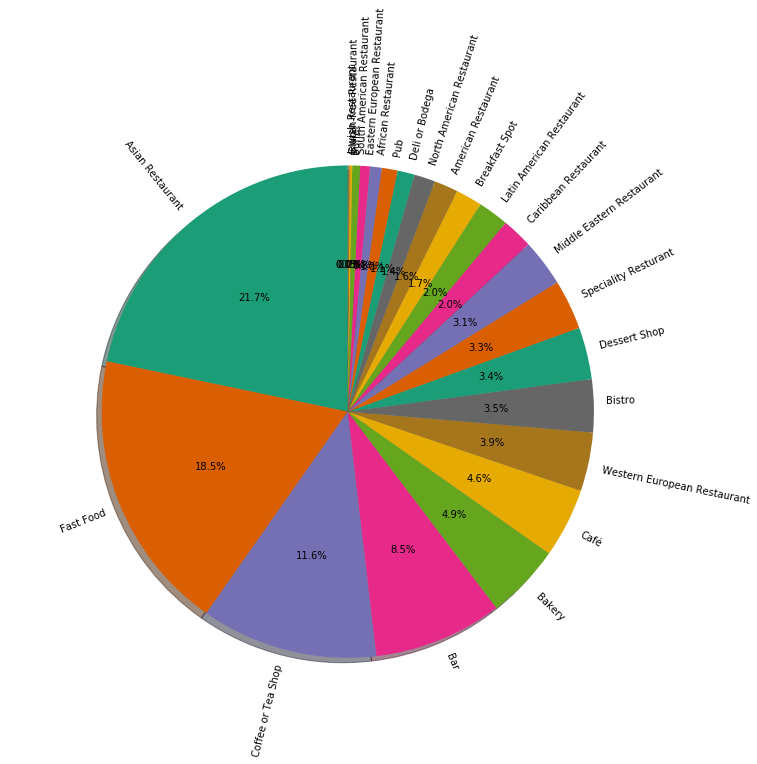

In [8]:
valueList = noMarginalRestaurantTypeByNeighborhood_df.sum(axis = 1).tolist()
labelList = noMarginalRestaurantTypeByNeighborhood_df.index.values.tolist()
figure(num=None, figsize=(12, 10), facecolor='w', edgecolor='k')
colormap = plt.cm.Dark2.colors   # Qualitative colormap
plt.pie(
    # using data total by type
    valueList,
    # with the labels being 
    labels=labelList,
    # with no shadows
    shadow=True,
    # with colors
    colors=colormap,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    labeldistance =1.05,
    rotatelabels=True
    )
# View the plot
plt.axis('equal')
plt.show()
plt.savefig('restauranttypePie.png', dpi=100)

# Produce a bar chart showing the resturants by neighborhood

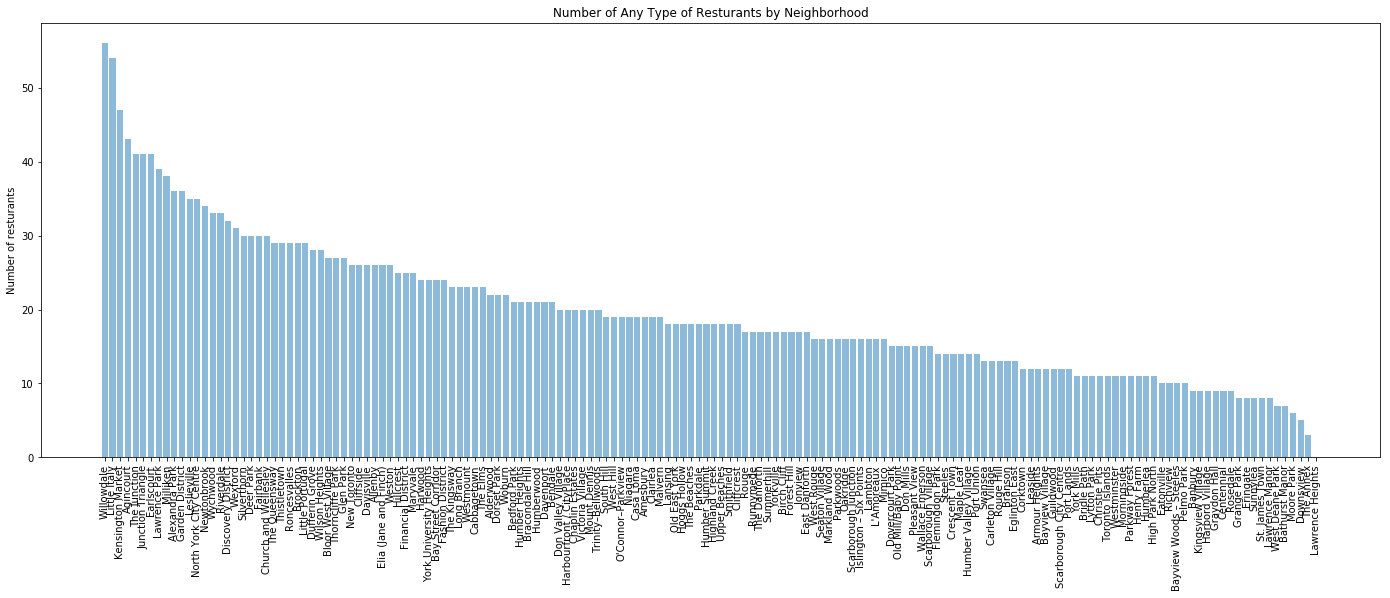

In [9]:
valueList = noMarginalRestaurantTypeByNeighborhood_df.sum(axis = 0).tolist()
labelList = list(noMarginalRestaurantTypeByNeighborhood_df.columns.values)

figure(num=None, figsize=(24, 8), facecolor='w', edgecolor='k')
y_pos = np.arange(len(labelList))
plt.bar(y_pos, valueList, align='center', alpha=0.5)
plt.xticks(rotation='vertical')
plt.xticks(y_pos, labelList)
plt.ylabel('Number of resturants')
plt.title('Number of Any Type of Resturants by Neighborhood')
 
# View the plot
plt.show()
plt.savefig('NeighborhoodBarchart.png', dpi=100)

# The following shows the number of resturants by category over all of Toronto

In [10]:
temp_df = restaurantTypeByNeighborhood_df.copy()
temp_df.drop("sum",inplace=True)
print(temp_df["Total by Type"])

South American Restaurant       16
Asian Restaurant               676
Speciality Resturant           102
Café                           142
Pub                             32
Deli or Bodega                  35
Western European Restaurant    120
Truck Stop                       0
Latin American Restaurant       63
Eastern European Restaurant     20
Fast Food                      577
Caribbean Restaurant            63
Bistro                         108
Gluten-free Restaurant           3
Bakery                         153
Coffee or Tea Shop             361
Buffet                           5
Breakfast Spot                  54
Australian Restaurant            0
North American Restaurant       43
Bar                            263
Jewish Restaurant                1
American Restaurant             49
Dessert Shop                   106
African Restaurant              24
Middle Eastern Restaurant       96
Name: Total by Type, dtype: int64


# The following Data Frame shows the number of people living in each neighborhood, available to each of the resturant types.
## This prevents the risk of saying there are 10,000 people in this neighborhood, and not noticing there are already 10,000 Asian restaurants there.
## By convention here, if there are no resturants of a given type, the table displays zero.  (Nobody can go to a restaurant that is isn't there.)

In [11]:
perCapitaRestaurantTypeByNeighborhood_df = noMarginalRestaurantTypeByNeighborhood_df.copy(deep=True)
for thisNeighborhood in list(demographics_df.index.values):
    thisPopulation = demographics_df.loc[thisNeighborhood,"Population"]
    for thisTypeRestaurant in perCapitaRestaurantTypeByNeighborhood_df.index:
        if perCapitaRestaurantTypeByNeighborhood_df.loc[thisTypeRestaurant, thisNeighborhood] > 0:
            perCapitaRestaurantTypeByNeighborhood_df.loc[thisTypeRestaurant, thisNeighborhood] =  thisPopulation/perCapitaRestaurantTypeByNeighborhood_df.loc[thisTypeRestaurant, thisNeighborhood]
perCapitaRestaurantTypeByNeighborhood_df.round(0)

,Willowdale,Little Italy,Kensington Market,Agincourt,The Junction,Junction Triangle,Earlscourt,Lawrence Park,Milliken,Alexandra Park,...,Eringate,Sunnylea,St. James Town,Lawrence Manor,West Deane Park,Bathurst Manor,Moore Park,Downsview,The Annex,Lawrence Heights
Asian Restaurant,1798.0,528.0,0.0,1311.0,1036.0,606.0,2155.0,554.0,1051.0,871.0,...,8008.0,17602.0,7333.0,4583.0,0.0,14945.0,2237.0,36613.0,15602.0,0
Fast Food,10786.0,1320.0,748.0,11144.0,3797.0,2222.0,8620.0,1331.0,13136.0,622.0,...,1602.0,0.0,0.0,13750.0,1465.0,4982.0,2237.0,36613.0,0.0,0
Coffee or Tea Shop,2876.0,3958.0,1247.0,14859.0,3797.0,2222.0,17240.0,1331.0,13136.0,4355.0,...,8008.0,0.0,7333.0,6875.0,2198.0,0.0,0.0,0.0,15602.0,0
Bar,43144.0,880.0,1247.0,44577.0,1898.0,1111.0,1724.0,6653.0,0.0,726.0,...,0.0,17602.0,14666.0,0.0,0.0,14945.0,0.0,0.0,0.0,0
Bakery,14381.0,7917.0,1247.0,0.0,3797.0,2222.0,8620.0,2218.0,13136.0,4355.0,...,0.0,8801.0,0.0,0.0,4395.0,0.0,0.0,0.0,15602.0,0
Café,21572.0,1583.0,935.0,0.0,5696.0,3333.0,5747.0,6653.0,0.0,4355.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4474.0,18306.0,0.0,0
Western European Restaurant,14381.0,1979.0,1247.0,0.0,11391.0,6666.0,5747.0,0.0,0.0,0.0,...,0.0,0.0,14666.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Bistro,0.0,0.0,0.0,0.0,11391.0,6666.0,17240.0,6653.0,0.0,4355.0,...,0.0,0.0,0.0,0.0,0.0,14945.0,4474.0,0.0,0.0,0
Dessert Shop,0.0,7917.0,1247.0,0.0,3797.0,2222.0,5747.0,1663.0,0.0,2178.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Speciality Resturant,0.0,3958.0,1247.0,44577.0,11391.0,6666.0,0.0,2218.0,3753.0,1452.0,...,0.0,0.0,14666.0,13750.0,0.0,0.0,0.0,0.0,0.0,0


# For each neighborhood, here is the most popular type of resturant, and an estimated number of people who might be interested

In [12]:
neighborhoodPopularBase_df = pd.DataFrame(columns=['neighborhood', 'category', 'custBase'])
for thisNeighborhood in list(perCapitaRestaurantTypeByNeighborhood_df):
    maxValue = 0
    venueName = ""
    for thisTypeRestaurant in perCapitaRestaurantTypeByNeighborhood_df.index:
        if maxValue < perCapitaRestaurantTypeByNeighborhood_df.loc[thisTypeRestaurant][thisNeighborhood]:
            maxValue = perCapitaRestaurantTypeByNeighborhood_df.loc[thisTypeRestaurant][thisNeighborhood]
            venueName = thisTypeRestaurant
    # Append rows in Empty Dataframe by adding dictionaries
    neighborhoodPopularBase_df = neighborhoodPopularBase_df.append({'neighborhood': thisNeighborhood, 'category': venueName, 'custBase': maxValue}, ignore_index=True)
neighborhoodPopularBase_df

,neighborhood,category,custBase
0,Willowdale,Bar,43144.0
1,Little Italy,Bakery,7917.0
2,Kensington Market,Caribbean Restaurant,3740.0
3,Agincourt,Bar,44577.0
4,The Junction,Western European Restaurant,11391.0
5,Junction Triangle,Western European Restaurant,6666.0
6,Earlscourt,Coffee or Tea Shop,17240.0
7,Lawrence Park,Bar,6653.0
8,Milliken,Fast Food,13136.0
9,Alexandra Park,Coffee or Tea Shop,4355.0


In [50]:
#df.loc[df['column_name'] == some_value]      df.index[df['BoolCol'] == True].tolist()
rowNum=157

neighborhood = demographics_df.index[rowNum]
print(neighborhood)
neighborhood = 'Lawrence Heights'
# neighborhoodPopularBase_df.loc[neighborhoodPopularBase_df['neighborhood'] == neighborhood]["category"].tolist()[0]
len(neighborhoodPopularBase_df.loc[neighborhoodPopularBase_df['neighborhood'] == neighborhood]["category"].tolist()[0]) > 0


Yorkville


False

# As backup, this is the potential market share (number of people per restaurant of that category) for all neighborhoods and categories

In [13]:
perCapitaRestaurantTypeByNeighborhood_df


,Willowdale,Little Italy,Kensington Market,Agincourt,The Junction,Junction Triangle,Earlscourt,Lawrence Park,Milliken,Alexandra Park,...,Eringate,Sunnylea,St. James Town,Lawrence Manor,West Deane Park,Bathurst Manor,Moore Park,Downsview,The Annex,Lawrence Heights
Asian Restaurant,1797.666667,527.800000,0.000000,1311.088235,1035.545455,606.0,2155.000000,554.416667,1050.880000,871.000000,...,8008.0,17602.0,7333.0,4583.333333,0.0,14945.000000,2237.0,36613.0,15602.0,0
Fast Food,10786.000000,1319.500000,748.000000,11144.250000,3797.000000,2222.0,8620.000000,1330.600000,13136.000000,622.142857,...,1601.6,0.0,0.0,13750.000000,1465.0,4981.666667,2237.0,36613.0,0.0,0
Coffee or Tea Shop,2876.266667,3958.500000,1246.666667,14859.000000,3797.000000,2222.0,17240.000000,1330.600000,13136.000000,4355.000000,...,8008.0,0.0,7333.0,6875.000000,2197.5,0.000000,0.0,0.0,15602.0,0
Bar,43144.000000,879.666667,1246.666667,44577.000000,1898.500000,1111.0,1724.000000,6653.000000,0.000000,725.833333,...,0.0,17602.0,14666.0,0.000000,0.0,14945.000000,0.0,0.0,0.0,0
Bakery,14381.333333,7917.000000,1246.666667,0.000000,3797.000000,2222.0,8620.000000,2217.666667,13136.000000,4355.000000,...,0.0,8801.0,0.0,0.000000,4395.0,0.000000,0.0,0.0,15602.0,0
Café,21572.000000,1583.400000,935.000000,0.000000,5695.500000,3333.0,5746.666667,6653.000000,0.000000,4355.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,4474.0,18306.5,0.0,0
Western European Restaurant,14381.333333,1979.250000,1246.666667,0.000000,11391.000000,6666.0,5746.666667,0.000000,0.000000,0.000000,...,0.0,0.0,14666.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0
Bistro,0.000000,0.000000,0.000000,0.000000,11391.000000,6666.0,17240.000000,6653.000000,0.000000,4355.000000,...,0.0,0.0,0.0,0.000000,0.0,14945.000000,4474.0,0.0,0.0,0
Dessert Shop,0.000000,7917.000000,1246.666667,0.000000,3797.000000,2222.0,5746.666667,1663.250000,0.000000,2177.500000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0
Speciality Resturant,0.000000,3958.500000,1246.666667,44577.000000,11391.000000,6666.0,0.000000,2217.666667,3753.142857,1451.666667,...,0.0,0.0,14666.0,13750.000000,0.0,0.000000,0.0,0.0,0.0,0


In [57]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[43.761539, -79.411079], zoom_start=11)
# Define colors for types of resturants
colors = {
    "American Restaurant": 'red',
    "Bistro": 'blue',
    "Breakfast Spot": 'gray',
    "Asian Restaurant": 'darkred',
    "Caribbean Restaurant": 'lightred',
    "Australian Restaurant": 'orange',
    "North American Restaurant": 'beige',
    "African Restaurant": 'green',
    "Truck Stop": 'darkgreen',
    "Jewish Restaurant": 'lightgreen',
    "Gluten-free Restaurant": 'darkblue',
    "Middle Eastern Restaurant": 'lightblue',
    "Eastern European Restaurant": 'purple',
    "Bar": 'darkpurple',
    "Dessert Shop": 'pink',
    "Speciality Resturant": 'cadetblue',
    "Fast Food": 'lightgray',
    "Coffee or Tea Shop": 'cadetblue',
    "Pub": 'darkgreen',
    "Bakery": 'pink',
    "Café": 'lightgray',
    "South American Restaurant": 'purple',
    "Deli or Bodega": 'orange',
    "Western European Restaurant": 'purple',
    "Latin American Restaurant": 'lightred',
    "Buffet": 'black',
}
# add markers to map
for rowNum in range(demographics_df.shape[0]):
    latitude = demographics_df.iloc[rowNum, 4]
    longitude = demographics_df.iloc[rowNum, 5]
    neighborhood = demographics_df.index[rowNum]
    if len(neighborhoodPopularBase_df.loc[neighborhoodPopularBase_df['neighborhood'] == neighborhood]["category"].tolist()[0]) > 0 :
        label = '{}, {}'.format(neighborhood, neighborhoodPopularBase_df.loc[neighborhoodPopularBase_df['neighborhood'] == neighborhood]["category"].tolist()[0])
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [latitude, longitude],
            radius=5,
            popup=label,
            color=colors[neighborhoodPopularBase_df.loc[neighborhoodPopularBase_df['neighborhood'] == neighborhood]["category"].tolist()[0]],
            fill=True,
            fill_color=colors[neighborhoodPopularBase_df.loc[neighborhoodPopularBase_df['neighborhood'] == neighborhood]["category"].tolist()[0]],
            fill_opacity=0.7,
            parse_html=False).add_to(map_toronto)

map_toronto.save('map_toronto.png')
map_toronto